# K-Means desde Cero

Este notebook explica la implementación del algoritmo K-Means desde cero, uno de los algoritmos de clustering más populares.

## ¿Qué es K-Means?

K-Means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters (grupos) basándose en la similitud. El objetivo es minimizar la suma de las distancias al cuadrado entre los puntos y sus centroides asignados.

## Conceptos Fundamentales

- **K**: Número de clusters a formar
- **Centroide**: Punto central (media) de un cluster
- **Inicialización**: Método para elegir los centroides iniciales
- **Asignación**: Asignar cada punto al centroide más cercano
- **Actualización**: Recalcular los centroides basándose en los puntos asignados


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


## Algoritmo K-Means

El algoritmo funciona de la siguiente manera:

1. **Inicializar**: Seleccionar K centroides aleatorios
2. **Asignar**: Asignar cada punto al centroide más cercano
3. **Actualizar**: Recalcular los centroides como la media de los puntos asignados
4. **Repetir**: Pasos 2 y 3 hasta convergencia (centroides no cambian o cambio mínimo)

### Función de Costo (Inercia)

$$J = \sum_{i=1}^{m} \min_{\mu_j} ||x^{(i)} - \mu_j||^2$$

Donde $\mu_j$ es el centroide del cluster $j$.


In [ ]:
class KMeansClustering:
    """Implementación básica de K-Means"""
    
    def __init__(self, k=3, max_iters=100, random_state=42):
        """
        Parámetros:
        - k: Número de clusters
        - max_iters: Número máximo de iteraciones
        - random_state: Semilla para reproducibilidad
        """
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.inertia_history = []
    
    def initialize_centroids(self, X):
        """Inicializa centroides aleatoriamente"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        centroids = np.zeros((self.k, n_features))
        
        for i in range(self.k):
            centroids[i] = X[np.random.choice(n_samples)]
        
        return centroids
    
    def euclidean_distance(self, x1, x2):
        """Calcula distancia euclidiana"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def assign_clusters(self, X, centroids):
        """Asigna cada punto al centroide más cercano"""
        n_samples = X.shape[0]
        labels = np.zeros(n_samples)
        
        for i in range(n_samples):
            distances = [self.euclidean_distance(X[i], centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)
        
        return labels
    
    def update_centroids(self, X, labels):
        """Actualiza los centroides como la media de los puntos asignados"""
        centroids = np.zeros((self.k, X.shape[1]))
        
        for i in range(self.k):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster, axis=0)
        
        return centroids
    
    def calculate_inertia(self, X, labels, centroids):
        """Calcula la inercia (suma de distancias al cuadrado)"""
        inertia = 0
        for i in range(self.k):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                inertia += np.sum([self.euclidean_distance(point, centroids[i]) ** 2 
                                  for point in points_in_cluster])
        return inertia
    
    def fit(self, X):
        """Entrena el modelo K-Means"""
        # Inicializar centroides
        self.centroids = self.initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Asignar puntos a clusters
            old_labels = self.labels.copy() if self.labels is not None else None
            self.labels = self.assign_clusters(X, self.centroids)
            
            # Calcular inercia
            inertia = self.calculate_inertia(X, self.labels, self.centroids)
            self.inertia_history.append(inertia)
            
            # Actualizar centroides
            new_centroids = self.update_centroids(X, self.labels)
            
            # Verificar convergencia
            if old_labels is not None and np.array_equal(self.labels, old_labels):
                break
            
            self.centroids = new_centroids
    
    def predict(self, X):
        """Predice a qué cluster pertenece cada punto"""
        return self.assign_clusters(X, self.centroids)


## Ejemplo: Clustering con K-Means


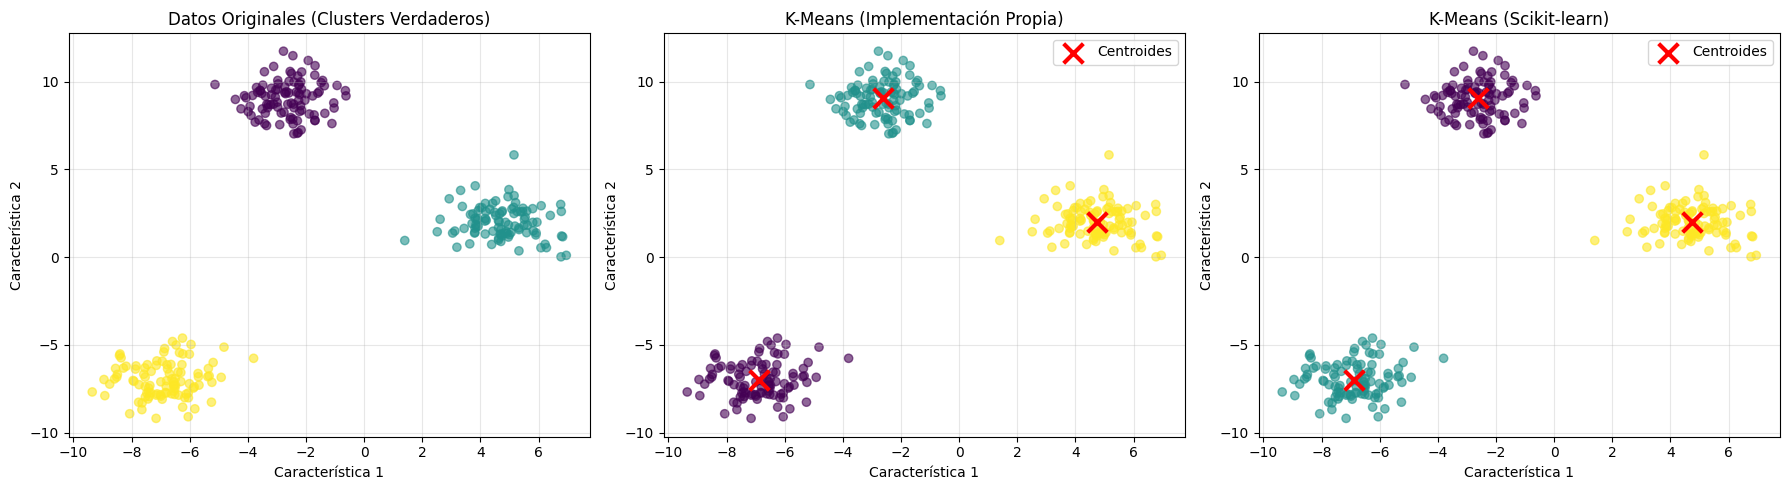

Inercia (Implementación propia): 566.8596
Inercia (Scikit-learn): 566.8596


In [ ]:
# Generar datos sintéticos con clusters claros
X, y_true = datasets.make_blobs(n_samples=300, centers=3, 
                                n_features=2, random_state=42)

# Usar nuestra implementación
kmeans_custom = KMeansClustering(k=3, max_iters=100, random_state=42)
kmeans_custom.fit(X)
labels_custom = kmeans_custom.labels

# Usar scikit-learn
kmeans_sklearn = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_sklearn.fit(X)
labels_sklearn = kmeans_sklearn.labels_

# Visualizar resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Datos originales
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6)
axes[0].set_title('Datos Originales (Clusters Verdaderos)')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')
axes[0].grid(True, alpha=0.3)

# Nuestra implementación
axes[1].scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', alpha=0.6)
axes[1].scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1], 
                c='red', marker='x', s=200, linewidths=3, label='Centroides')
axes[1].set_title('K-Means (Implementación Propia)')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Scikit-learn
axes[2].scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', alpha=0.6)
axes[2].scatter(kmeans_sklearn.cluster_centers_[:, 0], 
                kmeans_sklearn.cluster_centers_[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroides')
axes[2].set_title('K-Means (Scikit-learn)')
axes[2].set_xlabel('Característica 1')
axes[2].set_ylabel('Característica 2')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Inercia (Implementación propia): {kmeans_custom.inertia_history[-1]:.4f}")
print(f"Inercia (Scikit-learn): {kmeans_sklearn.inertia_:.4f}")


## Selección del Número Óptimo de Clusters

El método del codo (Elbow Method) ayuda a encontrar el número óptimo de clusters:


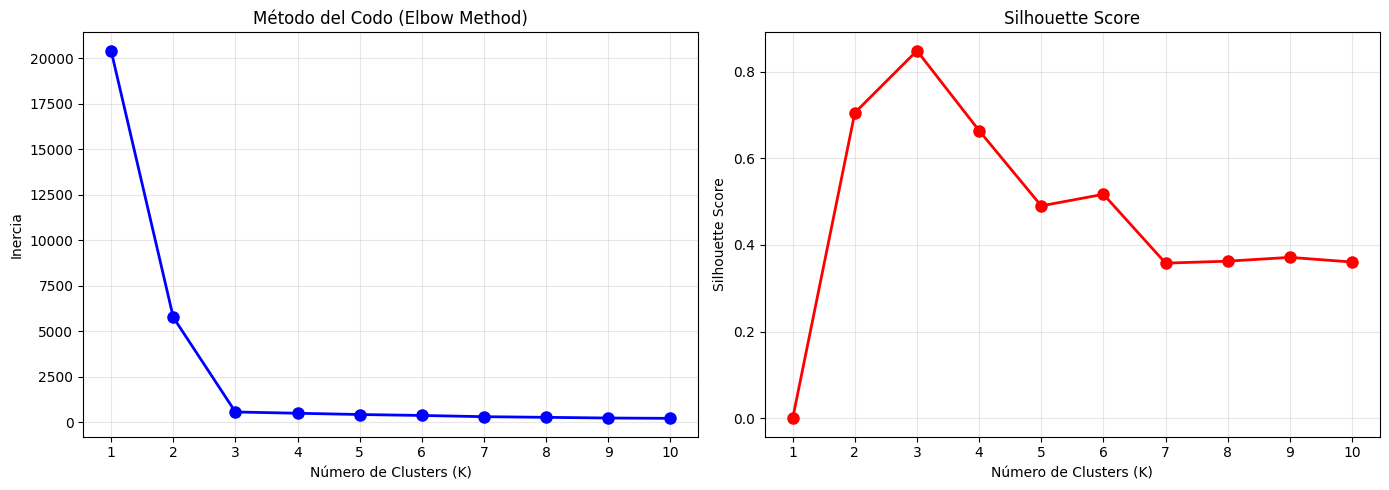

Mejor K según Silhouette Score: 3


In [ ]:
# Probar diferentes valores de K
k_range = range(1, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette requiere al menos 2 clusters
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    else:
        silhouette_scores.append(0)

# Visualizar método del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (K)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Método del Codo (Elbow Method)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

best_k = k_range[np.argmax(silhouette_scores)]
print(f"Mejor K según Silhouette Score: {best_k}")


## Convergencia del Algoritmo


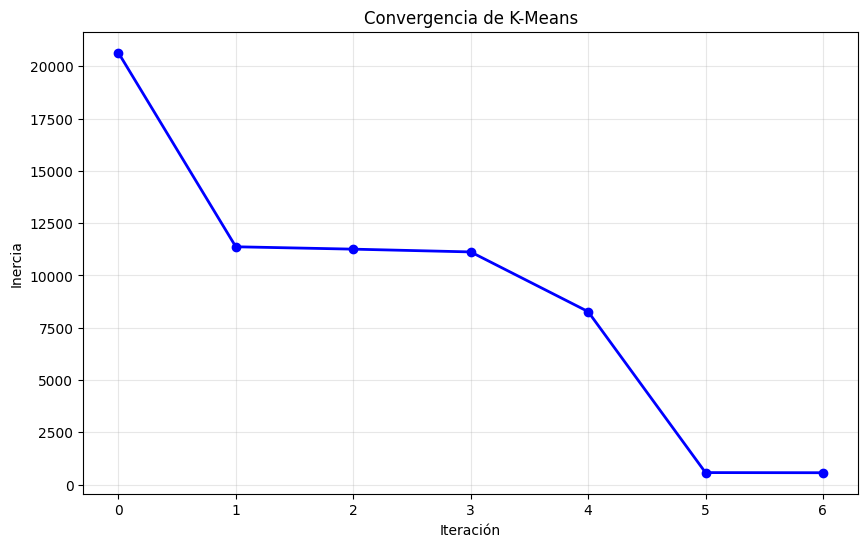

Número de iteraciones hasta convergencia: 7


In [ ]:
# Visualizar convergencia
plt.figure(figsize=(10, 6))
plt.plot(kmeans_custom.inertia_history, 'b-o', linewidth=2, markersize=6)
plt.xlabel('Iteración')
plt.ylabel('Inercia')
plt.title('Convergencia de K-Means')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Número de iteraciones hasta convergencia: {len(kmeans_custom.inertia_history)}")


## Ventajas y Desventajas

**Ventajas:**
- Simple de entender e implementar
- Rápido y eficiente computacionalmente
- Escala bien a grandes datasets
- Funciona bien con clusters esféricos y bien separados

**Desventajas:**
- Requiere especificar K (número de clusters) de antemano
- Sensible a la inicialización (puede converger a mínimos locales)
- Asume clusters esféricos (no funciona bien con formas complejas)
- Sensible a outliers
- No funciona bien con clusters de diferentes tamaños

## Aplicaciones

- Segmentación de clientes
- Compresión de imágenes
- Análisis de datos genéticos
- Detección de anomalías
- Organización de documentos
